<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

In [40]:
options(repr.plot.width=4, repr.plot.height=4)

# Nested ANOVA

## reading the data

In [41]:
path = '../datasets/data_chris/'
treatments = dir(path)

In [42]:
dfs = data.frame()
j=0
for(treatment in treatments){
#     print(treatment)
    animals = dir(paste(path,'/',treatment,sep=''))
    i=0
    for(animal in animals){
        df = read.table(paste(path,'/',treatment,'/',animal,sep=''),skip=1)
        df[,"animal"] = paste(treatment,'_',i,sep='')
        df[,"treatment"] = treatment
        df[,"volume"] = df[,'V1']
#         df[,'cell']=j
        dfs = rbind(dfs,df)
        i=i+1
        j=j+1
    }
}



In [43]:
data = subset(dfs,select = c("volume","animal","treatment"))
data$animal = as.factor(data$animal)
data$treatment = as.factor(data$treatment)
# data$cell = as.factor(data$cell)

In [44]:
library(nlme)

# Nested Analysis of Variance

In [49]:
data.aov = aov(volume ~ treatment + animal ,data=data)

In [50]:
summary(data.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
treatment     2   2244  1122.2  80.130 <2e-16 ***
animal        9    335    37.2   2.657  0.007 ** 
Residuals   145   2031    14.0                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

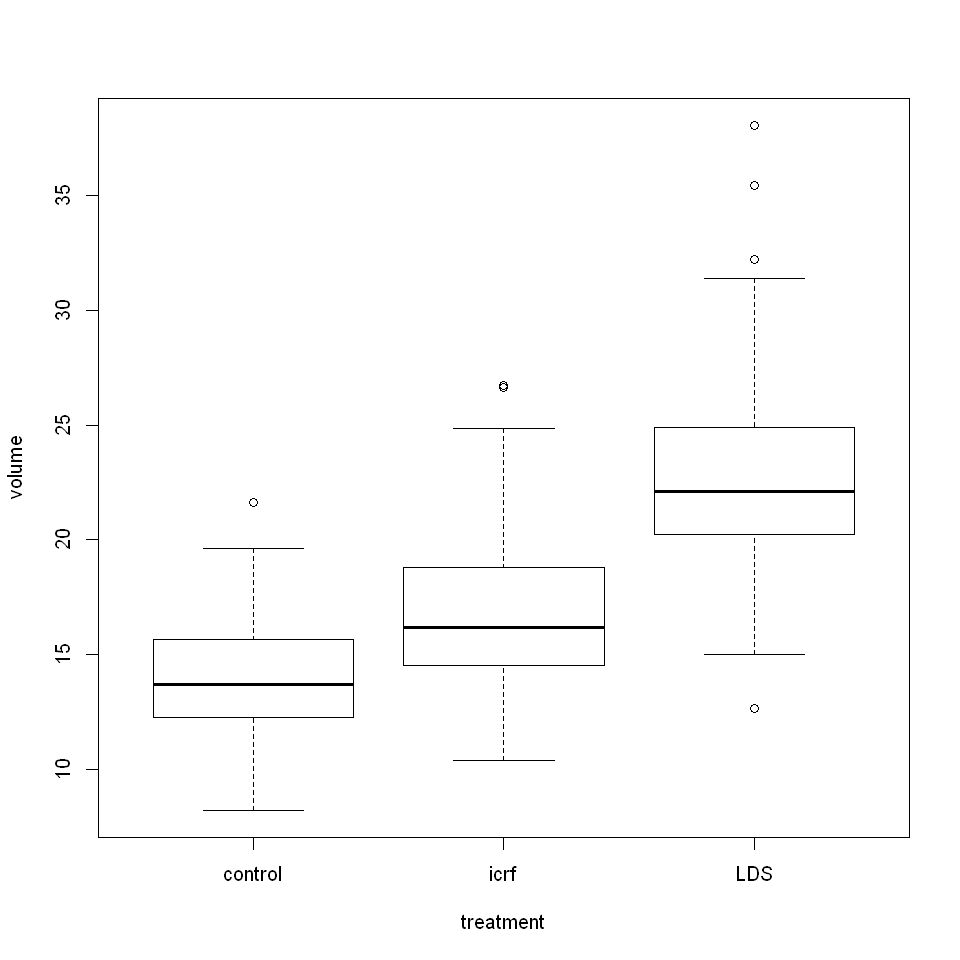

In [69]:
boxplot(volume ~ treatment,data=data)

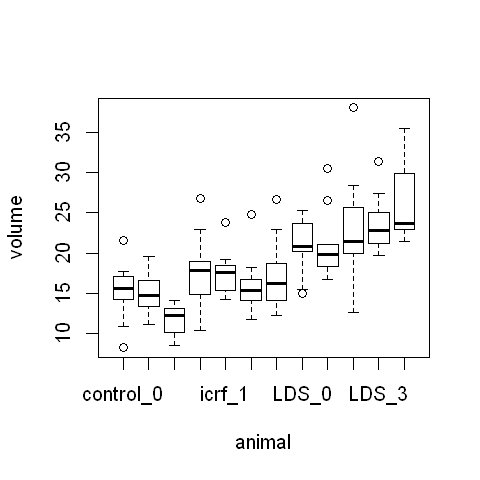

In [52]:
boxplot(volume ~ animal,data=data)

In [53]:
control.aov = aov(volume ~ animal,data=data[data[,"treatment"]=="control",])
icrf.aov = aov(volume ~ animal,data=data[data[,"treatment"]=="icrf",])
lds.aov = aov(volume ~ animal,data=data[data[,"treatment"]=="LDS",])

In [54]:
summary(control.aov)
summary(icrf.aov)
summary(lds.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
animal       2  111.1   55.54   8.681 0.000785 ***
Residuals   38  243.1    6.40                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value Pr(>F)
animal       3   23.1   7.696   0.595  0.621
Residuals   51  659.4  12.929               

            Df Sum Sq Mean Sq F value Pr(>F)  
animal       4  200.8   50.20   2.491 0.0533 .
Residuals   56 1128.2   20.15                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [56]:
summary(data.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
treatment     2   2244  1122.2  80.130 <2e-16 ***
animal        9    335    37.2   2.657  0.007 ** 
Residuals   145   2031    14.0                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

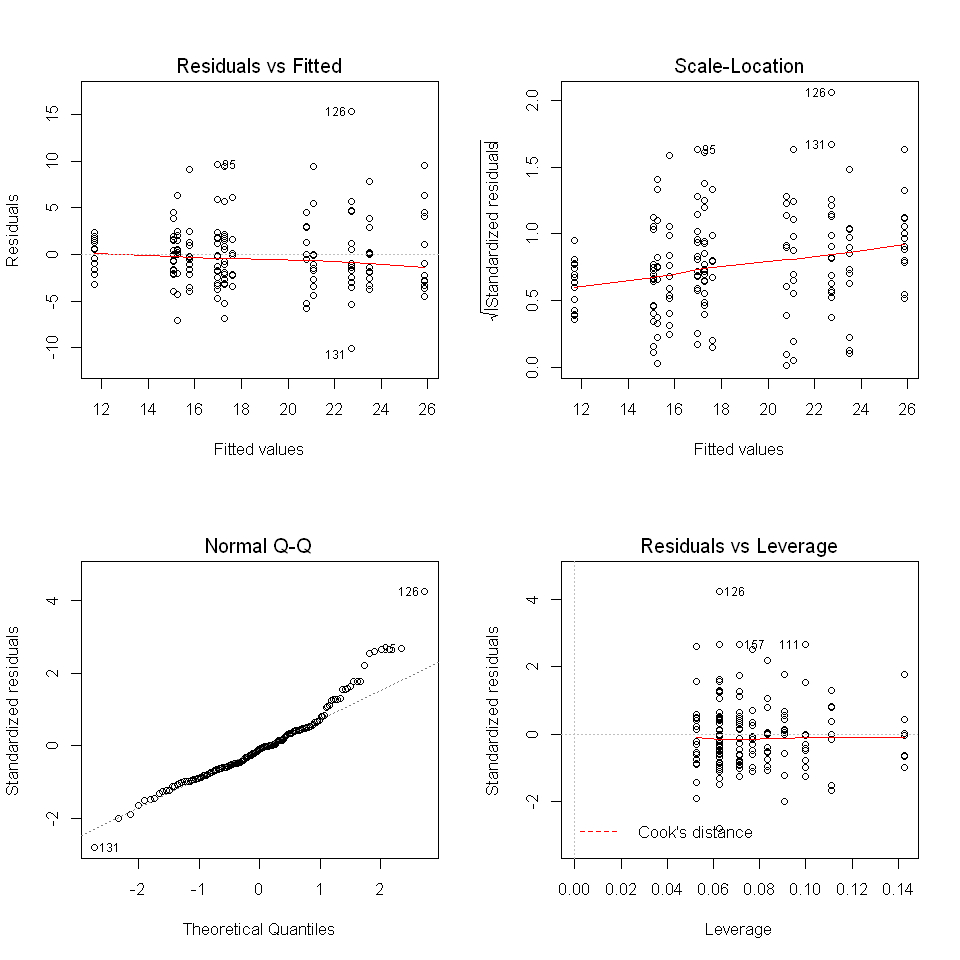

In [59]:
options(repr.plot.width=8, repr.plot.height=8)
layout(matrix(c(1,2,3,4),2,2))
plot(data.aov)

In [60]:
TukeyHSD(data.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = volume ~ treatment + animal, data = data)

$treatment
                 diff      lwr       upr     p adj
icrf-control 2.886482 1.057985  4.714979 0.0007738
LDS-control  9.065028 7.275350 10.854707 0.0000000
LDS-icrf     6.178546 4.530708  7.826385 0.0000000

$animal
                           diff        lwr       upr     p adj
control_1-control_0 -0.16986364 -5.0395110  4.699784 1.0000000
control_2-control_0 -3.56879221 -8.5781449  1.440561 0.4352432
icrf_0-control_0    -0.88184568 -5.5922637  3.828572 0.9999738
icrf_1-control_0    -0.53027425 -6.5414975  5.480949 1.0000000
icrf_2-control_0    -2.39038414 -7.4838051  2.703037 0.9206015
icrf_3-control_0    -1.19547068 -6.0651181  3.674177 0.9996193
LDS_0-control_0     -3.54428091 -9.1324478  2.043886 0.6185837
LDS_1-control_0     -3.23959203 -8.6719111  2.192727 0.7052331
LDS_2-control_0     -1.61582953 -6.4854769  3.253818 0.9941659
LDS_3-co

In [87]:
unique(data$animal)

[1] control_0 control_1 control_2 icrf_0    icrf_1    icrf_2    icrf_3   
 [8] LDS_0     LDS_1     LDS_2     LDS_3     LDS_4    
12 Levels: control_0 control_1 control_2 icrf_0 icrf_1 icrf_2 icrf_3 ... LDS_4

### testing

In [21]:
set.seed(1)
nTreat <- 3
nSites <- 15
nSitesPerTreat <- nSites/nTreat
nQuads <- 10
site.sigma <- 12
sigma <- 5
n <- nSites * nQuads
sites <- gl(n = nSites, k = nQuads, lab = paste0("S", 1:nSites))
A <- gl(nTreat, nSitesPerTreat * nQuads, n, labels = c("a1", "a2", "a3"))
a.means <- c(40, 70, 80)
## the site means (treatment effects) are drawn from normal distributions with means of 40, 70 and 80
## and standard deviations of 12
A.effects <- rnorm(nSites, rep(a.means, each = nSitesPerTreat), site.sigma)
Xmat <- model.matrix(~sites - 1)
lin.pred <- Xmat %*% c(A.effects)
## the quadrat observations (within sites) are drawn from normal distributions with means according to
## the site means and standard deviations of 5
y <- rnorm(n, lin.pred, sigma)
data.nest <- data.frame(y = y, A = A, Sites = sites, Quads = 1:length(y))
head(data.nest)  #print out the first six rows of the data set

y,A,Sites,Quads
<dbl>,<fct>,<fct>,<int>
32.25789,a1,S1,1
32.40160,a1,S1,2
37.20174,a1,S1,3
36.58866,a1,S1,4
35.45206,a1,S1,5
37.07744,a1,S1,6


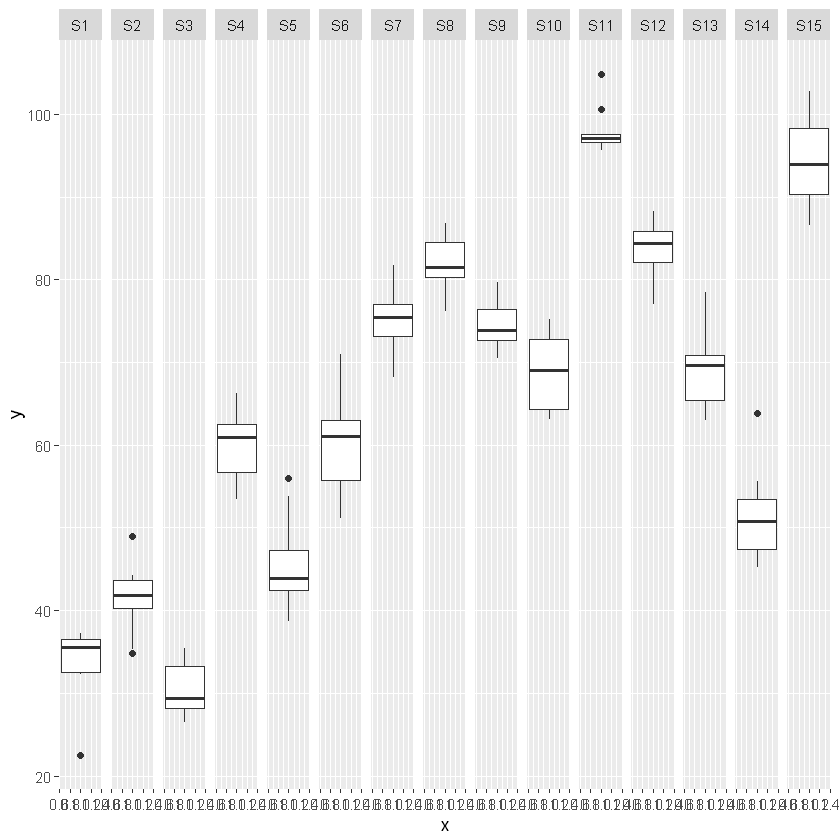

In [22]:
library(ggplot2)
ggplot(data.nest, aes(y = y, x = 1)) + geom_boxplot() + facet_grid(. ~ Sites)

In [31]:
data.lme = lme(volume ~ treatment,random = ~1|animal,data,method="REML" )

In [33]:
VarCorr(data.lme)

animal = pdLogChol(1) 
            Variance  StdDev  
(Intercept)  1.848465 1.359583
Residual    14.006646 3.742545

In [32]:
summary(data.lme)

Linear mixed-effects model fit by REML
 Data: data 
       AIC      BIC    logLik
  874.1597 889.3445 -432.0799

Random effects:
 Formula: ~1 | animal
        (Intercept) Residual
StdDev:    1.359583 3.742545

Fixed effects: volume ~ treatment 
                  Value Std.Error  DF   t-value p-value
(Intercept)   14.002031 0.9813077 145 14.268747  0.0000
treatmenticrf  2.873021 1.3041241   9  2.203027  0.0551
treatmentLDS   8.901171 1.2524299   9  7.107121  0.0001
 Correlation: 
              (Intr) trtmnt
treatmenticrf -0.752       
treatmentLDS  -0.784  0.590

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.7131867 -0.6126349 -0.1786329  0.4976448  4.0835244 

Number of Observations: 157
Number of Groups: 12 

In [63]:
fit = lme4::lmer("volume ~ treatment + (1|animal)",data=data)

In [64]:
summary(fit)

Linear mixed model fit by REML ['lmerMod']
Formula: volume ~ treatment + (1 | animal)
   Data: data

REML criterion at convergence: 864.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7132 -0.6126 -0.1786  0.4976  4.0835 

Random effects:
 Groups   Name        Variance Std.Dev.
 animal   (Intercept)  1.848   1.360   
 Residual             14.007   3.743   
Number of obs: 157, groups:  animal, 12

Fixed effects:
              Estimate Std. Error t value
(Intercept)    14.0020     0.9813  14.269
treatmenticrf   2.8730     1.3041   2.203
treatmentLDS    8.9012     1.2524   7.107

Correlation of Fixed Effects:
            (Intr) trtmnt
treatmntcrf -0.752       
treatmntLDS -0.784  0.590